In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
model_path = '/content/drive/My Drive/trainingFine.h5'  # Sesuaikan dengan path kamu

# Memuat model
model = tf.keras.models.load_model(model_path)
class_names = ['flower', 'plastik', 'wood']

1/1 [==============================] - 1s 1s/step
Predicted probabilities: [[0.78081155 0.0145596  0.20462896]]
Predicted class name: flower


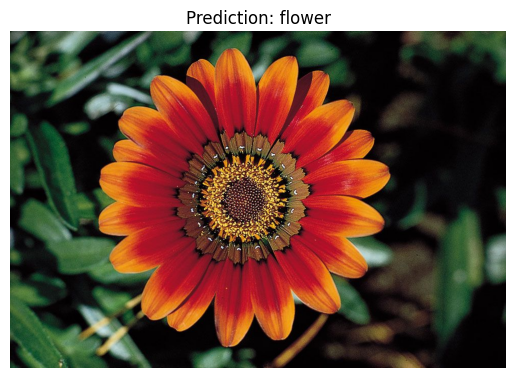

In [7]:
def process_image(image_path):
    # Load the image from a URL
    response = requests.get(image_path)
    img = Image.open(BytesIO(response.content))
    original_img = img.copy()  # Save the original image for display
    img = img.resize((224, 224))  # Resize image to fit model expected input
    img_array = image.img_to_array(img)  # Convert image to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess the image as per model's requirement
    return img_array, original_img  # Return both processed and original images

def predict(image_tensor):
    # Predict with the model
    preds = model.predict(image_tensor)
    return preds

# URL of the image to be tested
image_url = 'https://cdn.britannica.com/45/5645-050-B9EC0205/head-treasure-flower-disk-flowers-inflorescence-ray.jpg'
processed_image, original_img = process_image(image_url)  # Make sure to capture both returned values
prediction = predict(processed_image)

# Get the class with the highest probability
predicted_class_index = np.argmax(prediction, axis=-1)
predicted_class_name = class_names[predicted_class_index[0]]  # Map the index to the class name

# Output the prediction
print("Predicted probabilities:", prediction)
print("Predicted class name:", predicted_class_name)

# Display the image with prediction label
plt.imshow(original_img)
plt.title(f"Prediction: {predicted_class_name}")
plt.axis('off')  # Turn off axis
plt.show()